# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# I asked them to use their laptop so they already got all these packages from previous courses.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [2]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [3]:
## Remember by default it looks for credentials in home directory. 
## Make sure your updated credentials are in home directory
## or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data

aws_credentials ={"key": "key",
                  "secret": "secret",
                  "token":"token"} 

# Step 1: Read data
df = pd.read_csv("s3://mds-s3-8-mehwish/output/ml_data_SYD.csv", index_col=0, parse_dates=True, storage_options=aws_credentials)

In [4]:
## Use your ML skills to get from step 1 to step 6

In [5]:
# Step 2: Drop rows with NaNs
print("Shape before dropping nan rows:", df.shape)
df = df.dropna()
print("Shape after dropping nan rows:", df.shape)

Shape before dropping nan rows: (46020, 26)
Shape after dropping nan rows: (45989, 26)


In [6]:
# Step 3: Split data into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (36791, 26)
Test shape: (9198, 26)


In [7]:
# Convert index to datetime format
train_df.index = pd.to_datetime(train_df.index)

# Sort index by date
train_df = train_df.sort_index()

# Overview of data
train_df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
1889-01-07,0.347102,0.012561,0.780772,4.599509e-04,1.598180e+01,9.254538,5.343101e+00,15.105793,0.211540,3.154230,...,2.101678e-02,1.187939e-13,2.491990e-01,8.221049e-13,1.490119e-01,6.488937e-01,6.970733,1.117913,3.021798,0.403645


In [8]:
# Step 4: EDA - Explore the summary statistics of the data
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


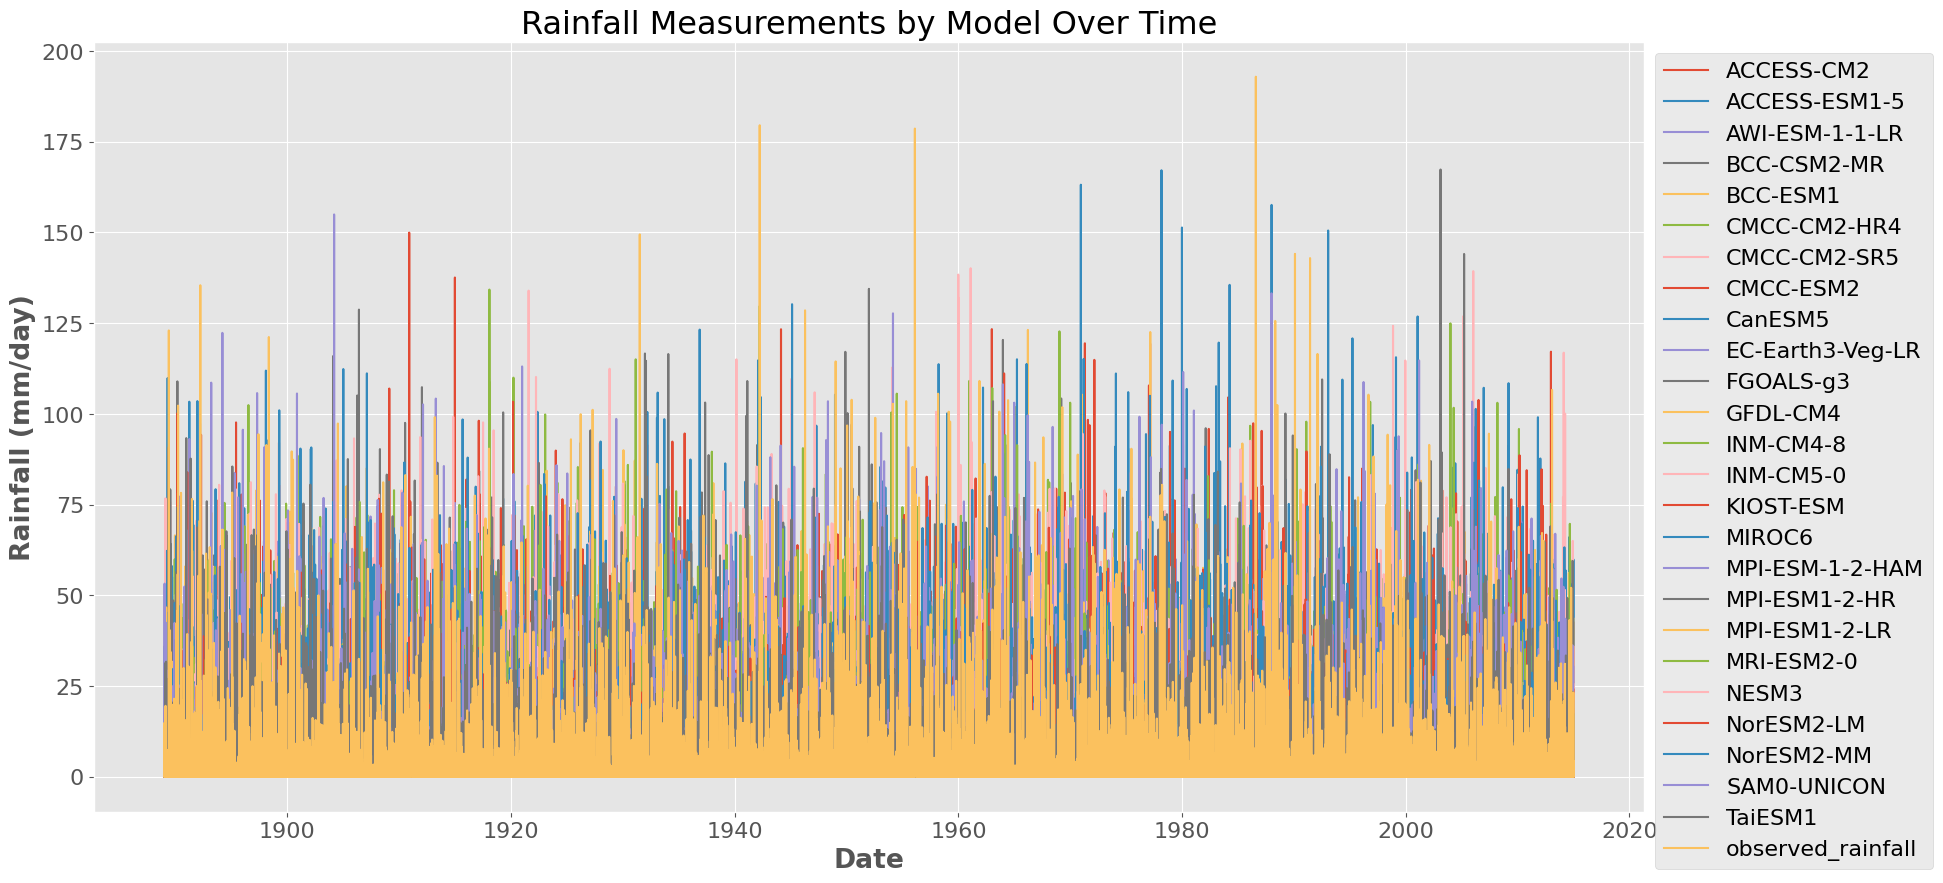

In [9]:
# Step 4: EDA - Plot rainfall data over time per model
plt.figure(figsize=(20, 10))
for column in train_df.columns:
    plt.plot(train_df.index, train_df[column], label=column)
plt.xlabel('Date')
plt.ylabel('Rainfall (mm/day)')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Rainfall Measurements by Model Over Time')
plt.show()

In [10]:
# Step 5: Train ensemble model

# Split X from y
X_train = train_df.drop(columns=['observed_rainfall'])
y_train = train_df['observed_rainfall']
X_test = test_df.drop(columns=['observed_rainfall'])
y_test = test_df['observed_rainfall']

# Train random forest model
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [11]:
# Show RMSE score of ensemble model
print(f"Train RMSE: {mean_squared_error(y_train, rf_model.predict(X_train), squared=False):.2f}")
print(f"Test RMSE: {mean_squared_error(y_test, rf_model.predict(X_test), squared=False):.2f}")

Train RMSE: 3.14
Test RMSE: 8.86


In [12]:
# Step 6: Show RMSE scores of individual models for comparison
from collections import defaultdict

rmse_results = defaultdict(dict)
for model in X_train.columns:
    rmse_results[model]["Train RMSE"] = mean_squared_error(y_train, X_train[model], squared=False).round(2)
    rmse_results[model]["Test RMSE"] = mean_squared_error(y_test, X_test[model], squared=False).round(2)
    
pd.DataFrame.from_dict(rmse_results, orient="index")

,Train RMSE,Test RMSE
ACCESS-CM2,10.57,11.04
ACCESS-ESM1-5,10.64,10.70
AWI-ESM-1-1-LR,10.88,11.00
BCC-CSM2-MR,10.29,10.76
BCC-ESM1,10.07,10.62
CMCC-CM2-HR4,10.35,10.64
CMCC-CM2-SR5,10.94,11.48
CMCC-ESM2,10.71,11.25
CanESM5,10.57,11.15
EC-Earth3-Veg-LR,9.90,10.45


##### Step 6: Discussion

As we can see from the results table above, the RMSE scores from the individual models are all higher than the RMSE scores from the ensemble model for both the train and test sets, however, the difference is much larger for the training set. While the ensemble model performs much better than the individual models in the training set, but only slightly better on the test set. There is also a large gap in the train and test RMSE resulting from the ensemble model (3.14 and 8.86, respectively). This suggests that the Random Forest Regression model is overfitting and may not generalize well to real world data once deployed. However, hyperparameter optimization fine-tunes the model to reduce the test RMSE and reduce the effects of overfitting so that the final model is more generalizable. 

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [13]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=123)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=123)

In [14]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f"Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
Test RMSE: 8.65


In [15]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.

In [18]:
# Save model to S3 bucket
import s3fs

s3 = s3fs.S3FileSystem(anon=True)

with s3.open('s3://mds-s3-8-mehwish/output/model.joblib', 'wb') as f:
    dump(model, f)